# Sample customer churn prediction

Based on a synthetically generated data:

- tenure
- monthly charges
- using internet service (boolean)
- using phone service (boolean)

Using `sklearn` library for dataset generation, preparing data, training model, make predictions, and evaluate the results.
`maplotlib` and `heatmap` for visualisation.


In [1]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from seaborn import heatmap

In [2]:
# Generate a synthetic dataset resembling Telco Customer Churn
# Features: tenure, monthly charges, and two binary features for services (e.g., internet, phone)
X, y = make_classification(n_samples=1000, n_features=4, n_informative=3, n_redundant=0, 
                           n_clusters_per_class=1, weights=[0.7], flip_y=0.01, random_state=42)

In [3]:
# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a decision tree classifier
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [7]:
# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, conf_matrix

(0.93,
 array([[201,  10],
        [ 11,  78]]))

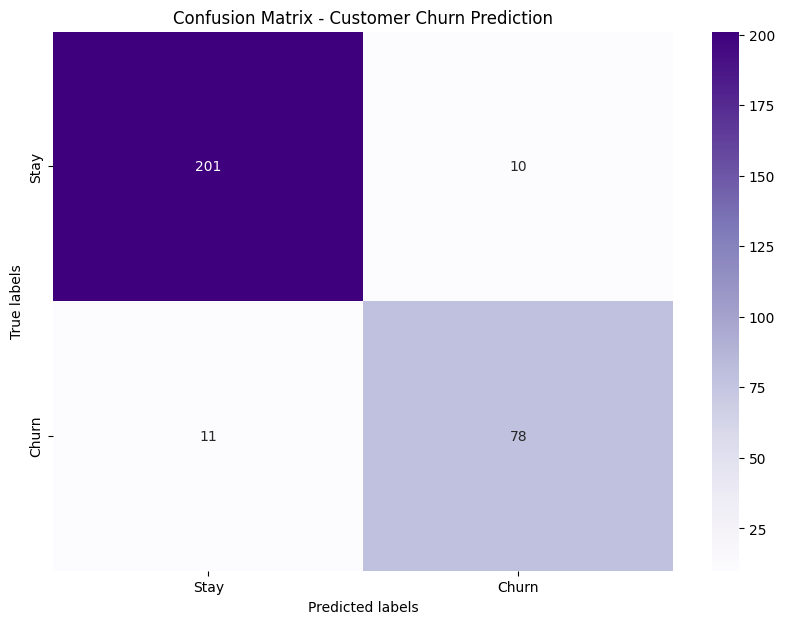

In [5]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
heatmap(conf_matrix, annot=True, fmt="d", cmap="Purples", xticklabels=['Stay', 'Churn'], yticklabels=['Stay', 'Churn'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Customer Churn Prediction')
plt.show()